In [1]:
import zeus21
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

import hmf
from hmf import MassFunction, Transfer   

import sys
sys.path.append('../21cm_ETHOS/21cmFAST-ethos-analysis-main/')
import sheth_tormen as st

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as P15
from astropy import constants as const
import astropy.units as u

In [2]:
#Cosmology

omega_cdm = 0.12#0.1411027587
CosmoParams_input = zeus21.Cosmo_Parameters_Input(omegac = omega_cdm)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo)
corrf = zeus21.Correlations(parcos,ClassyCosmo)
 #hmfint = zeus21.HMF_interpolator(parcos,ClassyCosmo)

#Astrophysics

eps_star = 0.15
parastro = zeus21.Astro_Parameters(parcos, epsstar=eps_star)

#Temperature

#T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint, zmin=12) 

In [3]:
eth = zeus21.ETHOS(parcos, ClassyCosmo, cosmo=P15, use_hmf=False, window_function = 'TopHat', f_params='Schneider18')
eth_bohr = zeus21.ETHOS(parcos, ClassyCosmo, cosmo=P15, use_hmf=False, window_function = 'Bohr', f_params='Schneider18')
#eth = zeus21.ETHOS(parcos, ClassyCosmo, corrf, cosmo=P15, logk=False, window_function = 'TopHat' ,f_params='ST')
Mhmin = 1e5
Mhmax = 1e14
NMhs = 100
MM = np.logspace(np.log10(Mhmin),np.log10(Mhmax),NMhs)

In [4]:

sigma_eth = np.sqrt(eth.sigma2_M(MM, LCDM=True))
dsigma2_eth =(eth.dsigma2_dM(MM, LCDM=True)) 
sigma_12_eth= sigma_eth*eth.growth_fac(12)
sigma_10_eth = sigma_eth*eth.growth_fac(10)
dsigma2_12_eth = dsigma2_eth*eth.growth_fac(12)
dsigma2_10_eth = dsigma2_eth*eth.growth_fac(10)


In [5]:
sigma_eth_bohr = np.sqrt(eth.sigma2_M(MM, LCDM=False, h_peak=0.4, k_peak=50))
dsigma2_eth_bohr =(eth.dsigma2_dM(MM, LCDM=False, h_peak=0.4, k_peak=50)) 
sigma_12_eth_bohr= sigma_eth_bohr*eth.growth_fac(12)
sigma_10_eth_bohr = sigma_eth_bohr*eth.growth_fac(10)
dsigma2_12_eth_bohr = dsigma2_eth_bohr*eth.growth_fac(12)
dsigma2_10_eth_bohr = dsigma2_eth_bohr*eth.growth_fac(10)

In [6]:
hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)
hmfint = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth, dsigma2_eth)

AttributeError: 'numpy.ndarray' object has no attribute 'critical_density0'

In [ ]:
sigma_10_eth

array([1.06253579, 1.04961874, 1.03676229, 1.02396908, 1.01123502,
       0.99856215, 0.9859507 , 0.9733992 , 0.96090878, 0.94847798,
       0.93610714, 0.9237952 , 0.91154169, 0.89934584, 0.88720661,
       0.87512305, 0.86309406, 0.85111844, 0.83919496, 0.82732238,
       0.81549956, 0.80372545, 0.79199919, 0.78032021, 0.7686883 ,
       0.75710362, 0.7455668 , 0.73407884, 0.72264111, 0.71125518,
       0.69992272, 0.68864526, 0.67742414, 0.66626045, 0.65515508,
       0.64410889, 0.63312284, 0.62219799, 0.61133551, 0.60053643,
       0.58980171, 0.57913226, 0.56852907, 0.55799319, 0.54752561,
       0.53712727, 0.52679917, 0.51654233, 0.50635773, 0.49624639,
       0.48620933, 0.47624759, 0.4663622 , 0.4565542 , 0.44682467,
       0.43717466, 0.42760525, 0.4181175 , 0.40871247, 0.39939123,
       0.39015484, 0.38100437, 0.37194085, 0.36296536, 0.35407895,
       0.34528269, 0.33657767, 0.32796499, 0.31944575, 0.31102109,
       0.30269216, 0.29446019, 0.28632641, 0.27829208, 0.27035

In [ ]:
hmfint.sigmatab[:,13]

array([1.05865084, 1.04578102, 1.03297157, 1.02022514, 1.00753764,
       0.9949111 , 0.98234577, 0.96984016, 0.9573954 , 0.94501006,
       0.93268445, 0.92041753, 0.90820882, 0.89605756, 0.88396272,
       0.87192334, 0.85993833, 0.84800649, 0.8361266 , 0.82429744,
       0.81251785, 0.80078678, 0.7891034 , 0.77746712, 0.76587774,
       0.75433542, 0.74284078, 0.73139482, 0.71999891, 0.70865462,
       0.69736359, 0.68612736, 0.67494727, 0.6638244 , 0.65275964,
       0.64175384, 0.63080795, 0.61992305, 0.60910028, 0.59834069,
       0.58764522, 0.57701477, 0.56645035, 0.555953  , 0.54552369,
       0.53516337, 0.52487303, 0.51465369, 0.50450633, 0.49443196,
       0.4844316 , 0.47450628, 0.46465704, 0.4548849 , 0.44519094,
       0.43557622, 0.42604179, 0.41658873, 0.40721809, 0.39793093,
       0.38872832, 0.3796113 , 0.37058093, 0.36163825, 0.35278433,
       0.34402023, 0.33534704, 0.32676585, 0.31827776, 0.3098839 ,
       0.30158543, 0.29338355, 0.28527951, 0.27727456, 0.26937

In [ ]:
hmfint.sigmaMhtab[:,13]

array([1.08149542, 1.07003601, 1.05850766, 1.04690824, 1.03522465,
       1.02344698, 1.01157966, 0.99964295, 0.98766302, 0.97565781,
       0.96363133, 0.9515822 , 0.93951634, 0.92744715, 0.91538362,
       0.9033272 , 0.89128201, 0.87925595, 0.86725233, 0.85527389,
       0.84332569, 0.83140992, 0.81952988, 0.8076881 , 0.79588698,
       0.78412868, 0.77241527, 0.76074854, 0.74913022, 0.7375619 ,
       0.72604507, 0.71458113, 0.70317138, 0.69181708, 0.68051943,
       0.66927957, 0.65809862, 0.64697765, 0.63591771, 0.62491982,
       0.613985  , 0.60311423, 0.59230852, 0.58156883, 0.57089615,
       0.56029145, 0.54975571, 0.53928991, 0.52889502, 0.51857205,
       0.50832198, 0.49814582, 0.48804459, 0.47801929, 0.46807097,
       0.45820066, 0.44840941, 0.4386983 , 0.42906839, 0.41952078,
       0.41005656, 0.40067686, 0.39138279, 0.38217549, 0.37305612,
       0.36402583, 0.35508582, 0.34623724, 0.33748132, 0.32881926,
       0.32025226, 0.31178158, 0.30340842, 0.29513406, 0.28695

Text(0, 0.5, '$\\sigma$')

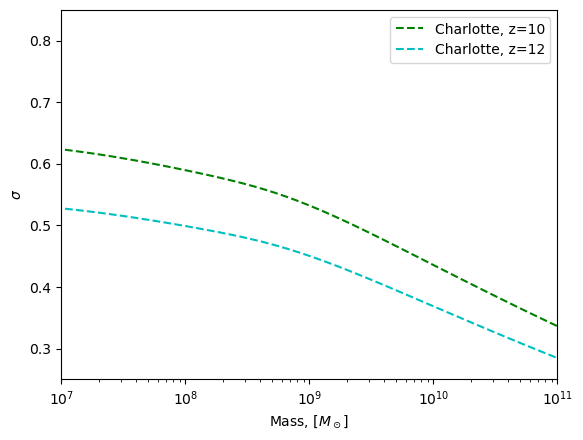

In [ ]:
fig, ax = plt.subplots()


ax.plot(MM,sigma_10_eth_bohr,'g--',label='Charlotte, z=10' ) 
ax.plot(MM,sigma_12_eth_bohr,'c--',label='Charlotte, z=12' ) 
plt.xscale('log')
#plt.yscale('log')

plt.legend()
plt.xlim(1e7, 1e11)
plt.ylim(0.25, 0.85)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$") 

In [ ]:
(eth.dN_dlnM(hmfint.Mhtab, z=10, h_peak=0., k_peak=0., LCDM=True))

array([1.15064981e+04, 9.24329005e+03, 7.41598024e+03, 5.94676723e+03,
       4.76563903e+03, 3.81489513e+03, 3.05193840e+03, 2.43911728e+03,
       1.94768980e+03, 1.55374148e+03, 1.23830039e+03, 9.85838234e+02,
       7.84044194e+02, 6.22844042e+02, 4.94205773e+02, 3.91660693e+02,
       3.09995127e+02, 2.45025227e+02, 1.93395086e+02, 1.52413135e+02,
       1.19922223e+02, 9.41954788e+01, 7.38518362e+01, 5.77874492e+01,
       4.51214417e+01, 3.51511978e+01, 2.73169979e+01, 2.11732286e+01,
       1.63654607e+01, 1.26119889e+01, 9.68909243e+00, 7.41921637e+00,
       5.66156961e+00, 4.30469054e+00, 3.26051144e+00, 2.45962023e+00,
       1.84746981e+00, 1.38132578e+00, 1.02779155e+00, 7.60816932e-01,
       5.60126159e-01, 4.09987971e-01, 2.98244830e-01, 2.15536613e-01,
       1.54680066e-01, 1.10182713e-01, 7.78651455e-02, 5.45626908e-02,
       3.78898758e-02, 2.60589326e-02, 1.77382327e-02, 1.19418391e-02,
       7.94516730e-03, 5.21964756e-03, 3.38292613e-03, 2.16087129e-03,
      

Text(0.5, 0, 'Mass, $[M_\\odot]$')

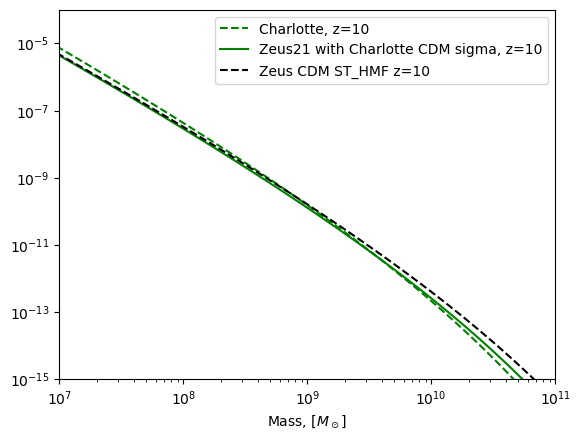

In [ ]:
fig, ax = plt.subplots()


ax.plot(hmfint.Mhtab,(eth.dN_dlnM(hmfint.Mhtab, z=10, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab,'g--',label='Charlotte, z=10' ) 
ax.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g-',label='Zeus21 with Charlotte CDM sigma, z=10')
#ax.plot(hmfint.Mhtab,hmfint_CDM.HMFtab[:,13],'g+-',label='Zeus21 with ETHOS sigma hpeak=0.4, kpeak=50, z=10' )
ax.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13]),'k--',label='Zeus CDM ST_HMF z=10')
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)
plt.xlabel(r"Mass, $[M_\odot]$")


Text(0, 0.5, '$dn/d{M}$ [Mpc$^{-3}$]')

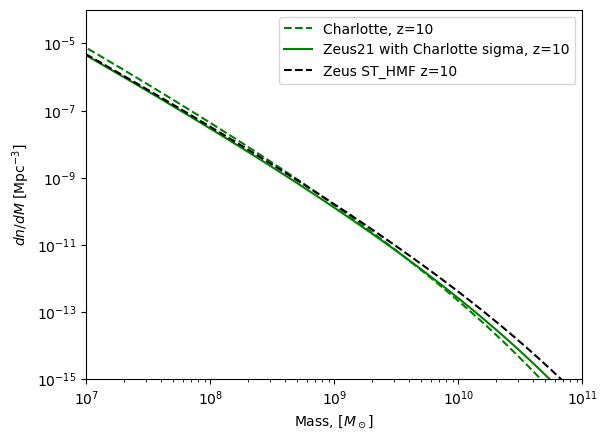

In [ ]:
fig, ax = plt.subplots()


ax.plot(hmfint.Mhtab,(eth.dN_dlnM(hmfint.Mhtab, z=10, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab,'g--',label='Charlotte, z=10' ) 
ax.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g-',label='Zeus21 with Charlotte sigma, z=10' ) 
ax.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13]),'k--',label='Zeus ST_HMF z=10')
#x.plot(hmfint.Mhtab,(eth.dN_dlnM(hmfint.Mhtab, z=12, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab,'g--',label='Charlotte, z=12' ) 
#ax.plot(hmfint.Mhtab,hmfint.HMFtab[:,17],'c-',label='Zeus21 with Charlotte sigma, z=12' ) 
#ax.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,17],hmfint.dsigmadMMhtab[:,17]),'k-',label='Zeus ST_HMF z=12')
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

Text(0, 0.5, '$dn/d{M}$ [Mpc$^{-3}$]')

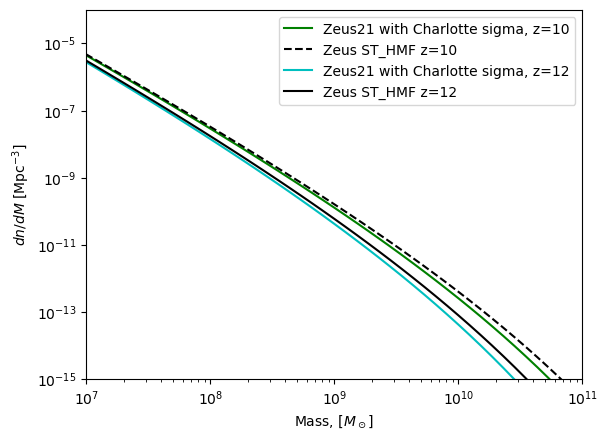

In [ ]:
fig, ax = plt.subplots()


#ax.plot(hmfint.Mhtab,(eth.dN_dlnM(hmfint.Mhtab, z=10, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab,'g--',label='Charlotte, z=10' ) 
ax.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g-',label='Zeus21 with Charlotte sigma, z=10' ) 
ax.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13]),'k--',label='Zeus ST_HMF z=10')
#ax.plot(hmfint.Mhtab,(eth.dN_dlnM(hmfint.Mhtab, z=12, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab,'g--',label='Charlotte, z=12' ) 
ax.plot(hmfint.Mhtab,hmfint.HMFtab[:,17],'c-',label='Zeus21 with Charlotte sigma, z=12' ) 
ax.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,17],hmfint.dsigmadMMhtab[:,17]),'k-',label='Zeus ST_HMF z=12')
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

Text(0, 0.5, '$\\sigma$')

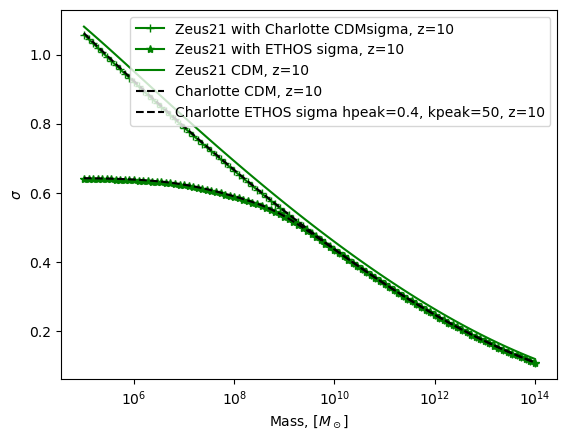

In [ ]:
fig, ax = plt.subplots()


#ax.plot(MM,sigma_12_eth,'c--',label='Charlotte Class PK, z=12' )
#ax.plot(MM,sigma_eth*hmfint.gftab[3],'k',label='Charlotte sigma' ) 

#ax.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,12], 'c-',label='Zeus21, z=12' )
ax.plot(hmfint.Mhtab,hmfint.sigmatab[:,13],'g+-', label='Zeus21 with Charlotte CDMsigma, z=10')
ax.plot(hmfint.Mhtab,hmfint_ethos.sigmatab[:,13],'g*-', label='Zeus21 with ETHOS sigma, z=10')
ax.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,13],'g-',label='Zeus21 CDM, z=10' )
ax.plot(MM,sigma_10_eth,'k--',label='Charlotte CDM, z=10' )
ax.plot(MM,sigma_10_eth_bohr,'k--',label='Charlotte ETHOS sigma hpeak=0.4, kpeak=50, z=10' ) 
#ax.plot(hmfint.Mhtab,hmfint.sigmatab[:,12],'c+-',)
plt.xscale('log')
#plt.yscale('log')

plt.legend()
#plt.xlim(1e7, 1e11)
#plt.ylim(0.3, 1)

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$") 

In [ ]:
len(hmfint_ethos.sigmatab[:,13])

100

In [ ]:
len(sigma_10_eth_bohr)

100

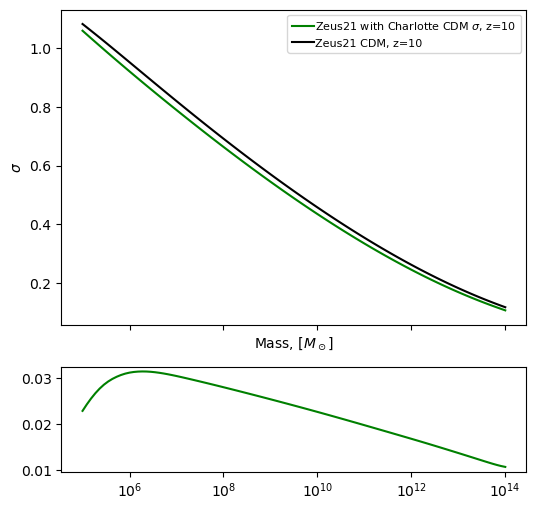

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(hmfint.Mhtab,hmfint.sigmatab[:,13],'g-', label='Zeus21 with Charlotte CDM $\sigma$, z=10')
ax1.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,13],'k-',label='Zeus21 CDM, z=10' )
ax2.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,13]-hmfint.sigmatab[:,13],'g-')
plt.xscale('log')

ax1.set_xlabel(r"Mass, $[M_\odot]$")
ax1.set_ylabel(r"$\sigma$") 

ax1.legend(loc='upper right', fontsize=8, handletextpad=0.1)


In [ ]:
hmfint.sigmaMhtab[:,13]

array([1.08149542, 1.07003601, 1.05850766, 1.04690824, 1.03522465,
       1.02344698, 1.01157966, 0.99964295, 0.98766302, 0.97565781,
       0.96363133, 0.9515822 , 0.93951634, 0.92744715, 0.91538362,
       0.9033272 , 0.89128201, 0.87925595, 0.86725233, 0.85527389,
       0.84332569, 0.83140992, 0.81952988, 0.8076881 , 0.79588698,
       0.78412868, 0.77241527, 0.76074854, 0.74913022, 0.7375619 ,
       0.72604507, 0.71458113, 0.70317138, 0.69181708, 0.68051943,
       0.66927957, 0.65809862, 0.64697765, 0.63591771, 0.62491982,
       0.613985  , 0.60311423, 0.59230852, 0.58156883, 0.57089615,
       0.56029145, 0.54975571, 0.53928991, 0.52889502, 0.51857205,
       0.50832198, 0.49814582, 0.48804459, 0.47801929, 0.46807097,
       0.45820066, 0.44840941, 0.4386983 , 0.42906839, 0.41952078,
       0.41005656, 0.40067686, 0.39138279, 0.38217549, 0.37305612,
       0.36402583, 0.35508582, 0.34623724, 0.33748132, 0.32881926,
       0.32025226, 0.31178158, 0.30340842, 0.29513406, 0.28695

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


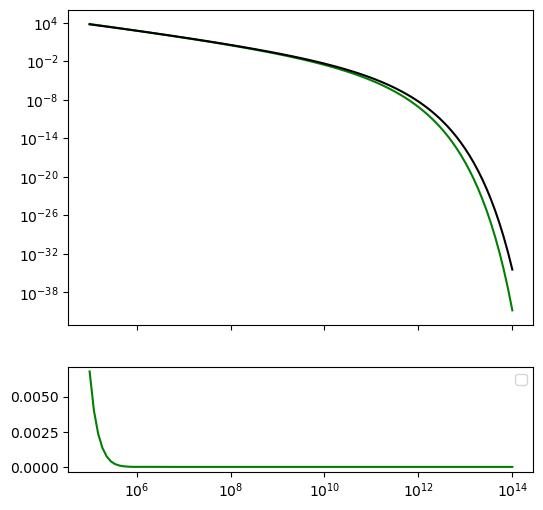

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
#ax1.plot(hmfint.Mhtab,(eth.dN_dlnM(hmfint.Mhtab, z=10, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab,'g--',label='Charlotte, z=10' ) 
ax1.plot(hmfint.Mhtab,hmfint.HMFtab[:,13]*hmfint.Mhtab,'g-',label='Zeus21 with Charlotte sigma, z=10' ) 
ax1.loglog(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13])*hmfint.Mhtab,'k-',label='Zeus ST_HMF z=10')

#ax2.plot(hmfint.Mhtab, abs(zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13])-(eth.dN_dlnM(hmfint.Mhtab, z=10, h_peak=0., k_peak=0., LCDM=True))/hmfint.Mhtab), 'g--')
ax2.plot(hmfint.Mhtab, abs(zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13])-hmfint.HMFtab[:,13]), 'g-')



plt.legend()

In [ ]:
zeus21.growth(parcos, hmfint.zHMFtab)[13]

0.11559865528791548

In [ ]:
zmin = hmfint._zmin
zmax = hmfint._zmax
Nzs = hmfint._Nzs
print(zmin,zmax, Nzs)
zHMFtab = np.linspace(
    zmin, zmax, Nzs
)

np.count_nonzero(zHMFtab!=hmfint.zHMFtab)

4.0 50.0 100


0

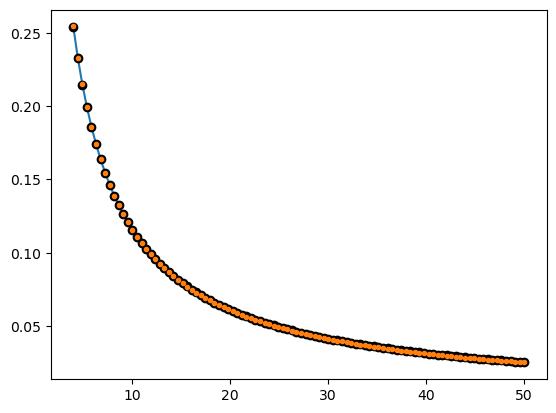

In [ ]:
gf = []

for z in range(0,100):
    gf.append(eth.growth_fac(hmfint.zHMFtab[z]))

plt.plot(hmfint.zHMFtab, hmfint.gftab)

plt.plot(hmfint.zHMFtab,zeus21.growth(parcos, hmfint.zHMFtab),'ko')
plt.plot(hmfint.zHMFtab, gf,'.')

In [ ]:
eth.growth_fac(hmfint.zHMFtab[10])

0.13225867524291593

In [ ]:
hmfint.gftab[10]

0.13225867524291593

In [ ]:
zeus21.growth(parcos, hmfint.zHMFtab)

array([0.25420879, 0.23279185, 0.21468357, 0.19917656, 0.1857534 ,
       0.17402319, 0.16368323, 0.15450109, 0.14629579, 0.1389174 ,
       0.13224708, 0.1261886 , 0.1206617 , 0.11559866, 0.11094353,
       0.10665006, 0.10267673, 0.09898905, 0.09555773, 0.09235691,
       0.08936382, 0.08655892, 0.0839255 , 0.08144782, 0.07911249,
       0.07690781, 0.07482307, 0.0728486 , 0.0709759 , 0.06919755,
       0.06750633, 0.06589602, 0.06436108, 0.06289628, 0.06149686,
       0.06015856, 0.05887759, 0.05765019, 0.05647308, 0.05534334,
       0.0542581 , 0.05321475, 0.05221093, 0.05124451, 0.05031335,
       0.04941555, 0.04854943, 0.04771329, 0.04690558, 0.04612489,
       0.04536994, 0.04463941, 0.04393213, 0.04324708, 0.04258317,
       0.04193944, 0.04131499, 0.04070899, 0.0401206 , 0.03954906,
       0.03899371, 0.03845382, 0.03792876, 0.03741795, 0.03692081,
       0.03643678, 0.03596535, 0.03550607, 0.03505844, 0.03462202,
       0.03419642, 0.03378124, 0.03337608, 0.03298059, 0.03259

In [ ]:
T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint, zmin=10)

powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
klist = powerspec21.klist_PS
zlist = T21_coeff.zintegral

AttributeError: 'HMF_interpolator' object has no attribute 'sigmaR_int'

(-100.0, 20.0)

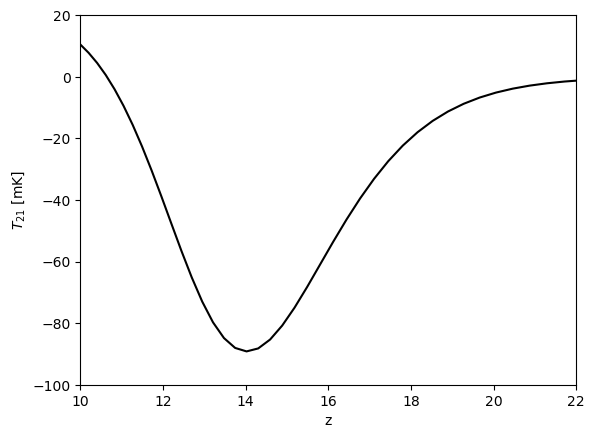

In [ ]:
plt.plot(zlist,T21_coeff.T21avg, 'k')
plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 22])
plt.ylim([-100, 20])



(-100.0, 20.0)

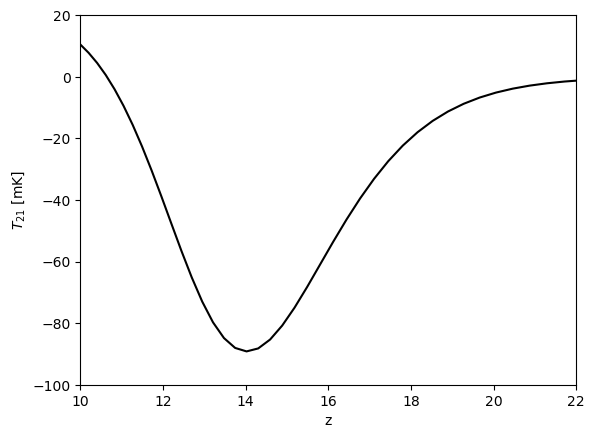

In [ ]:
plt.plot(zlist,T21_coeff.T21avg, 'k')
plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 22])
plt.ylim([-100, 20])

In [ ]:
#eth = zeus21.ETHOS(parcos, ClassyCosmo, cosmo=P15, use_hmf=False, window_function = 'TopHat', f_params='Schneider18')
#eth_bohr = zeus21.ETHOS(parcos, ClassyCosmo, cosmo=P15, use_hmf=True, window_function = 'Bohr', f_params='Schneider18')


hmfint_CDM= zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth, dsigma2_eth)

T21_coeff_CDM = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_CDM, zmin=10)
powerspec21_CDM = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_CDM, RSD_MODE=1)
zlist = T21_coeff_CDM.zintegral

#hmfint_bohr = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)

In [ ]:
#T21_coeff_bohr = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_bohr, zmin=8)
#powerspec21_bohr = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_bohr, RSD_MODE=1)
#zlist_bohr = T21_coeff_bohr.zintegral


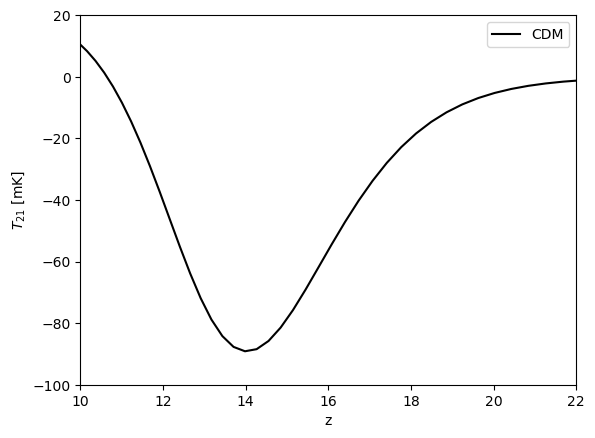

In [ ]:
fig3, ax3 = plt.subplots()

ax3.plot(zlist,T21_coeff_CDM.T21avg, 'k',label='CDM')

plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 22])
plt.ylim([-100, 20])
ax3.legend()

In [ ]:

kpeak = np.linspace(10,100,5)
hpeak = [0.4,0.8]#[0.2,0.4,0.8]

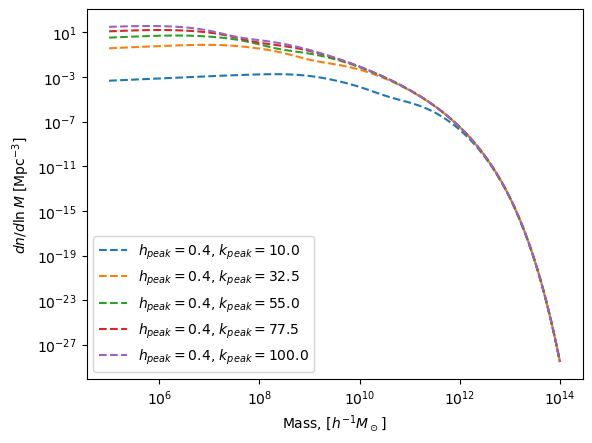

In [ ]:
fig, ax = plt.subplots()    
    
for j in range(0,len(kpeak)):
        
# Sheth Tormen, tophat

    plt.loglog(MM, eth_bohr.dN_dlnM(MM, z=10, h_peak=hpeak[0], k_peak=kpeak[j], LCDM=False), 
          ls='dashed', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    plt.legend()

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/d\ln{M}$ [Mpc$^{-3}$]");

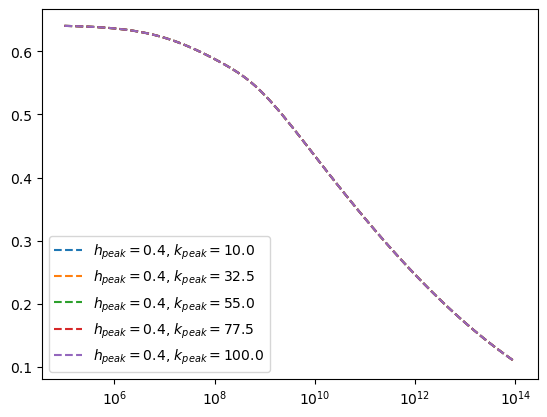

In [ ]:
fig, ax = plt.subplots()    
    
for j in range(0,len(kpeak)):
        
# Sheth Tormen, tophat

    plt.semilogx(MM, hmfint_ethos.sigmatab[:,13], 
          ls='dashed', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    plt.legend()


(1e-20, 0.01)

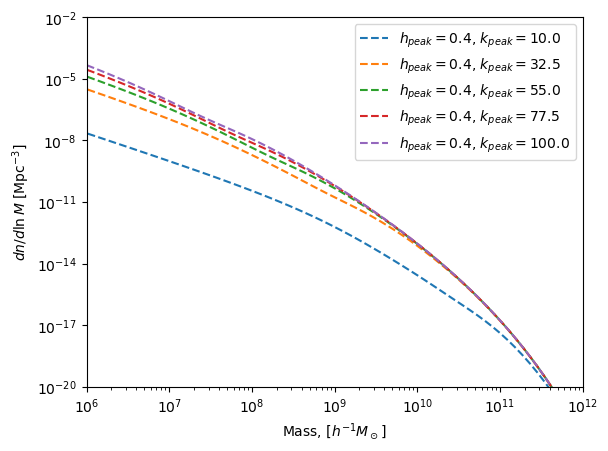

In [ ]:
fig, ax = plt.subplots()        
for j in range(0,len(kpeak)):
        
# Sheth Tormen, tophat
    sigma_eth_bohr = np.sqrt(eth.sigma2_M(MM, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j]))
    dsigma2_eth_bohr =(eth.dsigma2_dM(MM, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j])) 
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)
    plt.loglog(MM, hmfint_ethos.HMFtab[:,13], 
      ls='dashed', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    plt.legend()

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/d\ln{M}$ [Mpc$^{-3}$]");

plt.xlim(1e6,1e12)
plt.ylim(1e-20,1e-2)

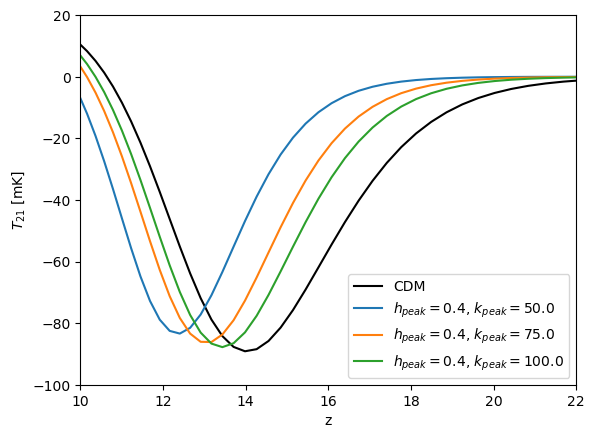

In [ ]:

                            

kpeak = np.linspace(50,100,3)
hpeak = [0.4,0.8]#[0.2,0.4,0.8] 


for j in range(0,len(kpeak)):
        
# Sheth Tormen, tophat
    sigma_eth_bohr = np.sqrt(eth.sigma2_M(MM, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j]))
    dsigma2_eth_bohr =(eth.dsigma2_dM(MM, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j])) 
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)
    T21_coeff_ethos = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21_ethos = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
    zlist = T21_coeff_ethos.zintegral
    ax3.plot(zlist,T21_coeff_ethos.T21avg ,label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    ax3.legend()


fig3

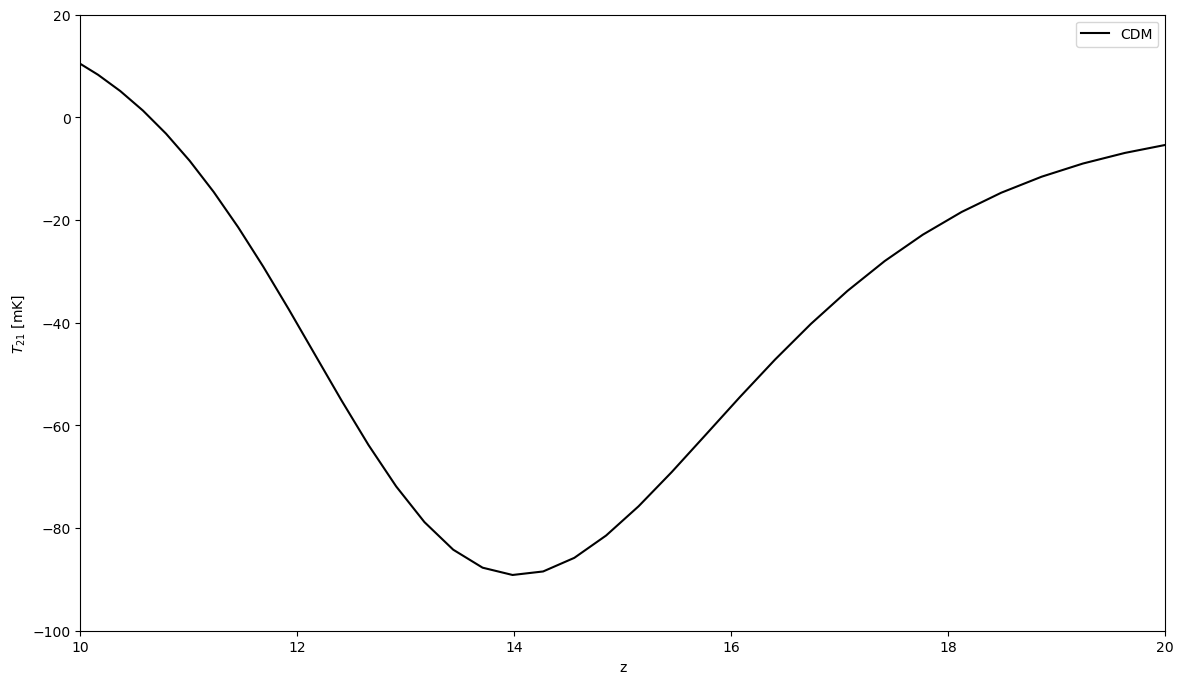

In [ ]:
fig4, ax4 = plt.subplots(figsize=(14,8))

ax4.plot(zlist,T21_coeff_CDM.T21avg, 'k',label='CDM')

plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 20])
plt.ylim([-100, 20])
ax4.legend()

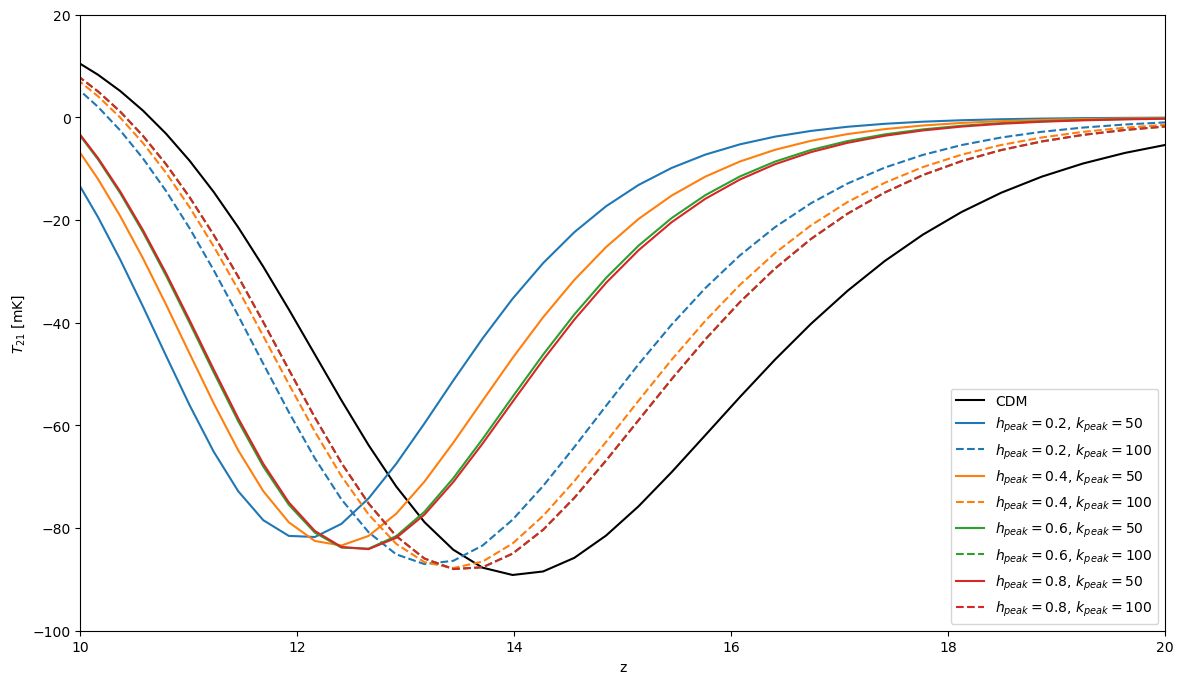

In [ ]:

kpeak = [50,100]
hpeak = [0.2,0.4,0.6,0.8] 


for i in range(0,len(hpeak)):
        
  
    sigma_eth_bohr = np.sqrt(eth.sigma2_M(MM, LCDM=False, h_peak=hpeak[i], k_peak=kpeak[0]))
    dsigma2_eth_bohr =(eth.dsigma2_dM(MM, LCDM=False, h_peak=hpeak[i], k_peak=kpeak[0])) 
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)
    T21_coeff_ethos = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21_ethos = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
    zlist = T21_coeff_ethos.zintegral
    ln = ax4.plot(zlist,T21_coeff_ethos.T21avg , 
       ls='solid', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[i],kpeak[0])) 
    sigma_eth_bohr = np.sqrt(eth.sigma2_M(MM, LCDM=False, h_peak=hpeak[i], k_peak=kpeak[1]))
    dsigma2_eth_bohr =(eth.dsigma2_dM(MM, LCDM=False, h_peak=hpeak[i], k_peak=kpeak[1])) 
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)
    T21_coeff_ethos = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21_ethos = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
    zlist = T21_coeff_ethos.zintegral
    ax4.plot(zlist,T21_coeff_ethos.T21avg , 
      c=ln[0].get_color(), ls='dashed', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[i],kpeak[1])) 
    ax4.legend()


fig4

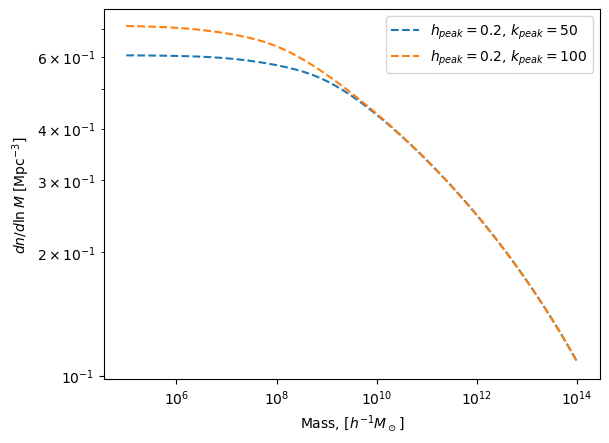

In [ ]:

for j in range(0,len(kpeak)):
        
# Sheth Tormen, tophat
    sigma_eth_bohr = np.sqrt(eth.sigma2_M(MM, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j]))
    dsigma2_eth_bohr =(eth.dsigma2_dM(MM, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j])) 
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, sigma_eth_bohr, dsigma2_eth_bohr)
    plt.loglog(MM, hmfint_ethos.sigmatab[:,13], 
      ls='dashed', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    plt.legend()

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/d\ln{M}$ [Mpc$^{-3}$]");
